In [1]:
import numba as nb
import numpy as np
from matplotlib import pyplot as plt

In [62]:
@nb.njit(parallel=True)
def get_inner_product(N):
    t = np.linspace(-10,10,1001)
    y = np.zeros(len(t),dtype="float64")
    nn = len(t)
    niter = N
    for i in nb.prange(nn):
        tt=t[i]
        s1=0
        s2=0
        for j in range(1,N):
            s1+= np.sinc(tt-j)*np.sinc(0.1*tt**2+tt-j)
            s2+= np.sinc(tt+j)*np.sinc(0.1*tt**2+tt+j)
        y[i] = s1+s2+np.sinc(tt)*np.sinc(0.1*tt**2+tt)
    return y     

In [34]:
np.sinc(-0.6)

0.5045511524271047

In [63]:
corr = get_inner_product(10000000)

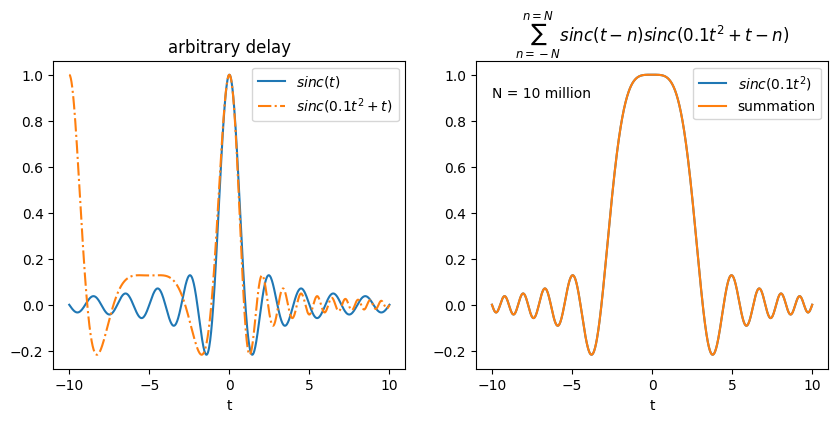

In [87]:
_t = np.linspace(-10,10,1001)
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
plt.title("arbitrary delay")
plt.plot(_t,np.sinc(_t),label=r"$sinc(t)$")
plt.plot(_t,np.sinc(0.1*_t**2+_t),ls='-.',label=r"$sinc(0.1t^2+t)$")
plt.xlabel("t")
plt.legend()
plt.subplot(122)
plt.title("$\sum_{n=-N}^{n=N}sinc(t-n)sinc(0.1t^2+t-n)$")
plt.text(-10,0.9,"N = 10 million")
plt.plot(_t,np.sinc(0.1*_t**2),label=r"$sinc(0.1t^2)$")
plt.plot(_t,corr,label='summation')
plt.xlabel("t")
plt.legend()

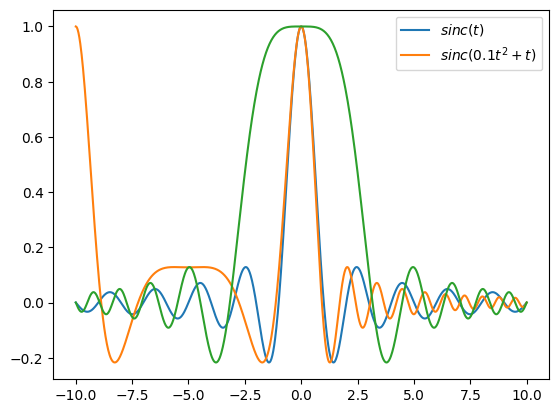

In [67]:

plt.legend()